# Simple Linear Regression

I will use Used Car Price Data from www.kaggle.com/ankits29/used-car-price-data to do simple linear regression.

In [23]:
#import required libraries

import pandas as pd

In [24]:
#read the data .csv file

df = pd.read_csv('car_data.csv')

In [25]:
#see the data head

pd.set_option('display.max_columns', None)
df.head()

,Model,Selling Price,Kilometers Driven,Year,Owner,Fuel Type,Transmission,Insurance,Car Condition
0,MarutiWagonR1.0LXI,312165,82238,2014,First Owner,Petrol + CNG,MANUAL,Expired,4.2
1,ToyotaEtiosLiva,313799,30558,2013,First Owner,Petrol,MANUAL,12-09-2021,4.4
2,MarutiAlto800,295999,22164,2018,First Owner,Petrol,MANUAL,01-12-2020,4.8
3,MarutiSwift,435199,30535,2013,First Owner,Diesel,MANUAL,Comp,4.3
4,MarutiWagonR1.0,289099,15738,2013,First Owner,Petrol,MANUAL,11-08-2021,4.3


In [26]:
#see how many rows there are

df.shape

(2237, 9)

In [27]:
#drop duplicates

df.drop_duplicates(inplace=True)

In [28]:
#see how many rows there are after duplicates dropped

df.shape

(2237, 9)

In [29]:
#see correlation between variables

df.corr()

,Selling Price,Kilometers Driven,Year,Car Condition
Selling Price,1.000000,-0.163254,0.568156,0.435813
Kilometers Driven,-0.163254,1.000000,-0.427502,-0.450421
Year,0.568156,-0.427502,1.000000,0.649011
Car Condition,0.435813,-0.450421,0.649011,1.000000


For this simple linear regression. let's use indpendent variable with highest correlation 'Year'.

In [30]:
#import required libraries

from sklearn.linear_model import LinearRegression

In [31]:
#make regression object and see the regression model function

lm = LinearRegression()

X = df[['Year']]
Y = df['Selling Price']

lm.fit(X,Y)

print('bo: ',lm.intercept_)
print('b1: ',lm.coef_)

bo:  -90346589.0282325
b1:  [45072.33897107]


the regression model function is Price = -90346589.0282325 + 45072.33897107*Year

In [32]:
#import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

(0.0, 2049174.8463791332)

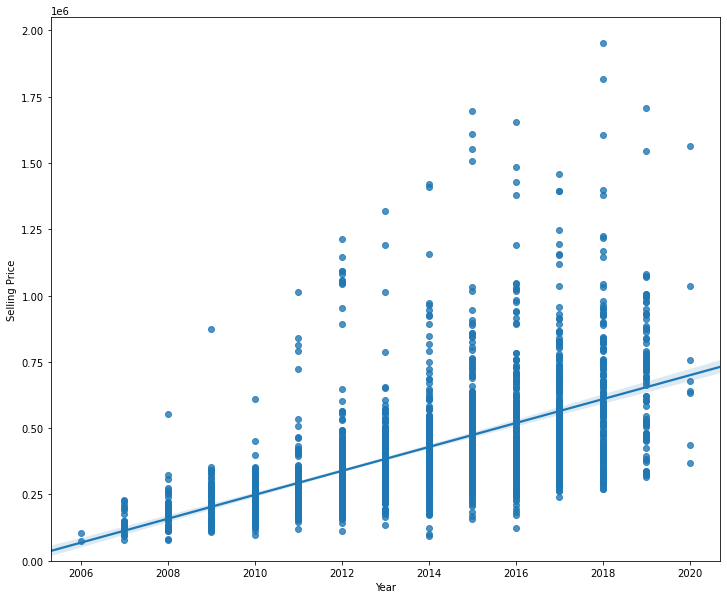

In [33]:
#plot the regression plot

plt.figure(figsize=(12, 10))
sns.regplot(x="Year", y="Selling Price", data=df)
plt.ylim(0,)

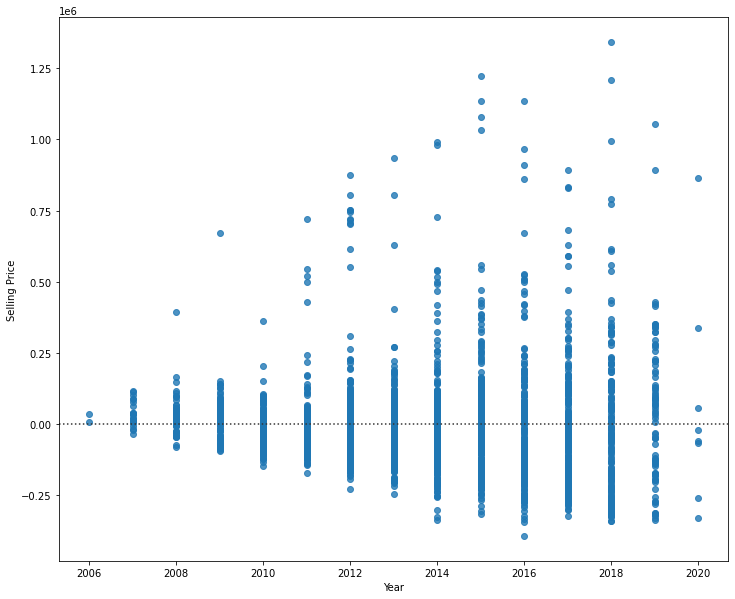

In [34]:
#plot residual plot to know if our model is appropriate

plt.figure(figsize=(12, 10))
sns.residplot(x="Year", y="Selling Price", data=df)
plt.show()

From resdual plot above we can see that residuals are not randomly spread, the variance tends to be higher with later models. Maybe non-linear model is more appropriate for this case.

In [35]:
#print R-square for in-sample measures

print('R-square: ', lm.score(X, Y))

R-square:  0.3228009884925541


The R-square of this model is not very good with simple linear regression model.

In [36]:
#print MSE for in-sample measures

from sklearn.metrics import mean_squared_error

Yhat=lm.predict(X)

mse = mean_squared_error(df['Selling Price'], Yhat)
print('Mean Square Error: ', mse)

Mean Square Error:  35203703975.957085


Created by Muhammad Ilham